
# <br/><br/><br/> Lithological facies classification using machine learning for reservoir characterization

In [28]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [4]:
data_filtered = pd.read_csv(r"C:\Users\lenovo\Downloads\data_filtered.csv")

2. Prepare data for modeling and blind test well

The wells not containing facies as gotten from the well plots are dropped which are well This affected wells Obom-9, Obom-10, Obom-11, Obom-12, and Obom-14. The well Obom-7 is taken as blind test well and other wells for modeling.

In [5]:
data_filtered

,Depth,GR,SP,DEN,RESDEP,Facies,Well_name,POR,lithofacies,Facies_Labels,Reservoir_Status
0,6500.5,40.834099,71.804199,2.2734,27.702000,2,OBOM-1,NaN,USF,USF,Reservoir
1,6501.0,45.631100,71.661797,2.3010,27.178900,2,OBOM-1,NaN,USF,USF,Reservoir
2,6501.5,47.282700,71.489899,2.3119,26.382900,2,OBOM-1,NaN,USF,USF,Reservoir
3,6502.0,51.463501,71.490196,2.3446,25.580299,2,OBOM-1,NaN,USF,USF,Reservoir
4,6502.5,55.879501,70.979301,2.3817,24.596100,2,OBOM-1,NaN,USF,USF,Reservoir
...,...,...,...,...,...,...,...,...,...,...,...
79741,8798.0,91.050003,54.827770,2.3881,9.135000,0,OBOM-13,NaN,Shale,SH,Non-Reservoir
79742,8798.5,92.940002,55.007641,2.4652,9.322400,0,OBOM-13,NaN,Shale,SH,Non-Reservoir
79743,8799.0,95.302498,55.187481,2.5110,9.607500,0,OBOM-13,NaN,Shale,SH,Non-Reservoir
79744,8799.5,100.500000,53.612499,2.5111,9.670500,0,OBOM-13,NaN,Shale,SH,Non-Reservoir


In [6]:
data_filtered.isnull().sum()

Depth                   0
GR                      0
SP                      0
DEN                     0
RESDEP                  0
Facies                  0
Well_name               0
POR                 57232
lithofacies             0
Facies_Labels           0
Reservoir_Status        0
dtype: int64

In [7]:
data_filtered['Well_name'].value_counts()

OBOM-6     10981
OBOM-1     10939
OBOM-2     10927
OBOM-3     10328
OBOM-8      8841
OBOM-4      8781
OBOM-7      8753
OBOM-5      4489
OBOM-13     4390
OBOM-9      1317
Name: Well_name, dtype: int64

In [8]:
from sklearn.preprocessing import QuantileTransformer

# Assuming 'data' is your DataFrame
# Specify the columns you want to transform
columns_to_transform = ['GR', 'RESDEP', 'DEN', 'SP']

# Create a copy of the original DataFrame to avoid modifying the original data
data_transformed_quantile_D = data_filtered.copy()

# Initialize the QuantileTransformer with a Gaussian distribution
quantile_transformer_D = QuantileTransformer(output_distribution='normal')

# Fit the transformer on the specified columns and transform the data
data_transformed_quantile_D[columns_to_transform] = quantile_transformer_D.fit_transform(data_filtered[columns_to_transform])

# Display the transformed data with quantile transformation and Gaussian distribution
print(data_transformed_quantile_D.head())

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


    Depth        GR        SP       DEN    RESDEP  Facies Well_name  POR  \
0  6500.5 -0.828011  0.988361 -0.615782  1.057172       2    OBOM-1  NaN   
1  6501.0 -0.702388  0.976037 -0.429008  1.047301       2    OBOM-1  NaN   
2  6501.5 -0.668486  0.964733 -0.367245  1.028504       2    OBOM-1  NaN   
3  6502.0 -0.591811  0.964743 -0.204893  1.008073       2    OBOM-1  NaN   
4  6502.5 -0.518018  0.938312 -0.048610  0.974457       2    OBOM-1  NaN   

  lithofacies Facies_Labels Reservoir_Status  
0         USF           USF        Reservoir  
1         USF           USF        Reservoir  
2         USF           USF        Reservoir  
3         USF           USF        Reservoir  
4         USF           USF        Reservoir  


In [9]:
data_transformed_quantile_D

,Depth,GR,SP,DEN,RESDEP,Facies,Well_name,POR,lithofacies,Facies_Labels,Reservoir_Status
0,6500.5,-0.828011,0.988361,-0.615782,1.057172,2,OBOM-1,NaN,USF,USF,Reservoir
1,6501.0,-0.702388,0.976037,-0.429008,1.047301,2,OBOM-1,NaN,USF,USF,Reservoir
2,6501.5,-0.668486,0.964733,-0.367245,1.028504,2,OBOM-1,NaN,USF,USF,Reservoir
3,6502.0,-0.591811,0.964743,-0.204893,1.008073,2,OBOM-1,NaN,USF,USF,Reservoir
4,6502.5,-0.518018,0.938312,-0.048610,0.974457,2,OBOM-1,NaN,USF,USF,Reservoir
...,...,...,...,...,...,...,...,...,...,...,...
79741,8798.0,0.530745,-0.018040,-0.024220,0.297279,0,OBOM-13,NaN,Shale,SH,Non-Reservoir
79742,8798.5,0.654930,-0.008648,0.261745,0.309767,0,OBOM-13,NaN,Shale,SH,Non-Reservoir
79743,8799.0,0.823172,0.002509,0.407441,0.326496,0,OBOM-13,NaN,Shale,SH,Non-Reservoir
79744,8799.5,1.204935,-0.075345,0.407896,0.330306,0,OBOM-13,NaN,Shale,SH,Non-Reservoir


In [10]:
data_transformed_quantile_D['Facies_Labels'].value_counts()

SH          42003
USF         18117
Channels    16535
LSF          2201
HT            890
Name: Facies_Labels, dtype: int64

In [11]:
# Now we extract just the feature variables we need to perform the classification. 
# The predictor variables are the five wireline values and two geologic constraining variables. 
# We also get a vector of the facies labels that correspond to each feature vector.
correct_facies_labels = data_transformed_quantile_D['Facies'].values

feature_vectors = data_transformed_quantile_D.drop(['Depth', 'Well_name','Facies','Facies_Labels', 'POR', 'lithofacies', 'Reservoir_Status'], axis=1)
feature_vectors.describe()

,GR,SP,DEN,RESDEP
count,79746.000000,79746.000000,79746.000000,79746.000000
mean,-0.000303,-0.000144,-0.000038,-0.000683
std,0.999762,0.999130,0.998772,1.003170
min,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.674615,-0.674495,-0.674443,-0.675280
50%,-0.000277,0.001246,0.000179,-0.000093
75%,0.674711,0.673702,0.673702,0.674847
max,5.199338,5.199338,5.199338,5.199338


In [12]:
data_filtered

,Depth,GR,SP,DEN,RESDEP,Facies,Well_name,POR,lithofacies,Facies_Labels,Reservoir_Status
0,6500.5,40.834099,71.804199,2.2734,27.702000,2,OBOM-1,NaN,USF,USF,Reservoir
1,6501.0,45.631100,71.661797,2.3010,27.178900,2,OBOM-1,NaN,USF,USF,Reservoir
2,6501.5,47.282700,71.489899,2.3119,26.382900,2,OBOM-1,NaN,USF,USF,Reservoir
3,6502.0,51.463501,71.490196,2.3446,25.580299,2,OBOM-1,NaN,USF,USF,Reservoir
4,6502.5,55.879501,70.979301,2.3817,24.596100,2,OBOM-1,NaN,USF,USF,Reservoir
...,...,...,...,...,...,...,...,...,...,...,...
79741,8798.0,91.050003,54.827770,2.3881,9.135000,0,OBOM-13,NaN,Shale,SH,Non-Reservoir
79742,8798.5,92.940002,55.007641,2.4652,9.322400,0,OBOM-13,NaN,Shale,SH,Non-Reservoir
79743,8799.0,95.302498,55.187481,2.5110,9.607500,0,OBOM-13,NaN,Shale,SH,Non-Reservoir
79744,8799.5,100.500000,53.612499,2.5111,9.670500,0,OBOM-13,NaN,Shale,SH,Non-Reservoir


In [13]:
facies_colors = [ '#808080', '#FF0000', '#FFFF00', '#00FF00', '#0000FF', '#808080']

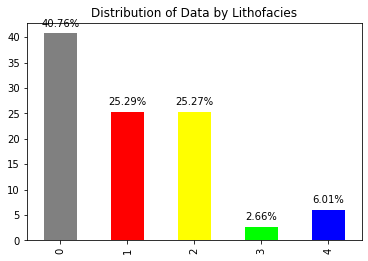

In [36]:
# Assuming 'data' is your DataFrame and 'Lithofacies' is the column of interest
facies_pers = blind['Facies'].value_counts().sort_index()

# Calculate the percentage
facies_percentage = facies_pers / facies_pers.sum() * 100

# Plotting the bar chart with percentage labels
ax = facies_percentage.plot(kind='bar', color=facies_colors, title='Distribution of Data by Lithofacies')

# Add percentage labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [37]:
# This function plots log dataset
# Arguments:
#     data_filtered      input clean dataset
#     vars      input variables to compare (e.g. ['Facies', 'Predictions'])
#     label     input facies names
#     color     input facies colors
def plot_data(data_filtered, vars, label, color):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    data = data_filtered.sort_values(by = 'Depth')
    name = ['GR', 'SP', 'DEN', 'RESDEP',]
    cmap = colors.ListedColormap(color[0:len(color)], 'indexed')
    
    zmin = data.Depth.min()
    zmax = data.Depth.max()
    
    panel = {}
    for i, var in enumerate(vars):
        panel[i] = np.repeat(np.expand_dims(data[var].values, 1), 100, 1)
        
    m = len(name)
    nvars = len(vars)
    
    f, ax = plt.subplots(nrows = 1, ncols = m + nvars, figsize = [7 + nvars, 12])
    ax[0].plot(data[name[0]], data.Depth, '-g')
    ax[1].plot(data[name[1]], data.Depth, '-')
    ax[2].plot(data[name[2]], data.Depth, '-', color = '0.5')
    ax[3].plot(data[name[3]], data.Depth, '-r')
    
    im = {}
    for i in range(nvars):
        im[i] = ax[m + i].imshow(panel[i], interpolation = 'none', aspect = 'auto', cmap = cmap, vmin = 1, vmax = 5)
    
    legend = make_axes_locatable(ax[m + nvars - 1])
    cax = legend.append_axes('right', size = '20%', pad = 0.05)
    cbar = plt.colorbar(im[0], cax = cax)
    cbar.set_label((17*' ').join(label))
    cbar.set_ticks(range(0, 1))
    cbar.set_ticklabels('')
    
    for i in range(len(ax) - nvars):
        ax[i].set_ylim(zmin, zmax)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis = 'x', nbins = 3)
        ax[i].set_xlabel(name[i])
        ax[i].set_xlim(data[name[i]].min(), data[name[i]].max())
        ax[i + 1].set_yticklabels([])
        
    for i, var in enumerate(vars):
        ax[m + i].set_xlabel(var)
        ax[m + i].set_xticklabels([])
        
    ax[0].set_ylabel('Depth', fontsize = 12)
    
    f.suptitle('Well: %s' % data['Well_name'].unique()[0], fontsize = 12, y = 0.9)

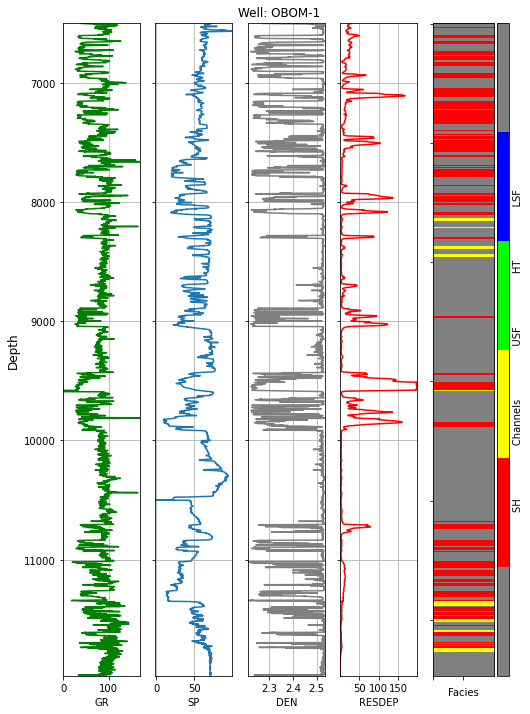

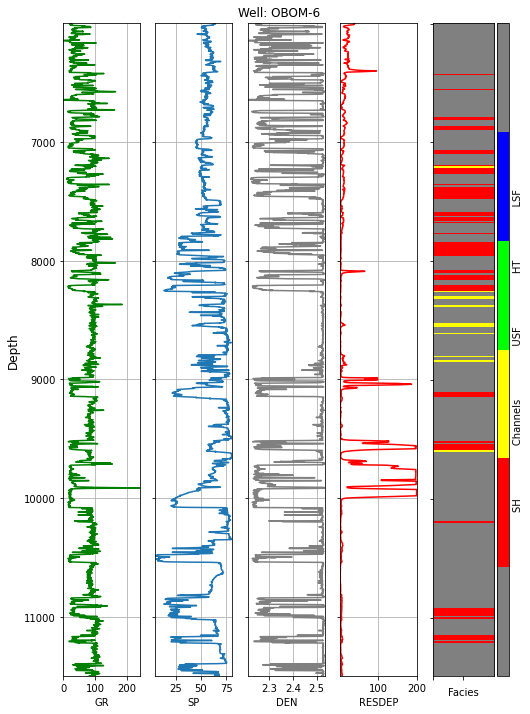

In [38]:
# Plot clean dataset
# SS - nonmarine sandstone   CSiS - nonmarine coarse siltstone   FSis - nonmarine fine siltstone
# SiSh - marine siltstone and shale   MS - mudstone (limestone)   WS - wackestone (limestone)
# D - dolomite   PS - packstone (limestone)   BS - bafflestone (limestone)


plot_data(data_filtered[data_filtered['Well_name'] == 'OBOM-1'], ['Facies'], facies_labels, facies_colors)
plot_data(data_filtered[data_filtered['Well_name'] == 'OBOM-6'], ['Facies'], facies_labels, facies_colors)

In [39]:
from sklearn.preprocessing import QuantileTransformer

# Assuming 'feature_vectors' is your data
# Initialize the QuantileTransformer with a Gaussian distribution
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Fit the transformer on the data and transform the features
scaled_features_quantile = quantile_transformer.fit_transform(feature_vectors)

# Display the transformed features
print(scaled_features_quantile)

[[-0.82801169  0.98835697 -0.61578113  1.05717115]
 [-0.70239003  0.97603466 -0.4290136   1.0472981 ]
 [-0.66849109  0.96473455 -0.36724446  1.02850217]
 ...
 [ 0.82317161  0.00250914  0.40744067  0.32649345]
 [ 1.20493543 -0.07534535  0.40789568  0.33030656]
 [ 1.25301616 -0.08415915  0.40789568  0.32649345]]


In [40]:
outcome = data_filtered['Facies'].values

### Create training set and test set

In [41]:
# Use of 10% of the predictors for test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features_quantile, outcome, test_size = 0.1, random_state = 42)

### Train the RF classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 42, n_jobs = -1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [43]:
y_predicted = clf.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[4026,   30,   93,   16,   10],
       [ 121, 1394,  180,    3,    0],
       [ 174,  164, 1438,    1,    0],
       [ 150,    3,   12,   66,    0],
       [  27,    2,    0,    0,   65]], dtype=int64)

In [45]:
# This function returns the classification accuracy
# The accuracy is defined as the number of correct classification divided by the total number of classifications
# Arguments:
#     cm       input confusion matrix
def accuracy(cm):
    n_correct = 0.0
    n_class = cm.shape[0]
    for i in np.arange(0, n_class):
        n_correct += cm[i][i]
    result = n_correct/sum(sum(cm))
    return result

# This function returns the adjusted classification accuracy
# The accuracy is defined as the number of correct classification divided by the total number of classifications
# Arguments:
#     cm       input confusion matrix
#     adj      adjacent facies
def accuracy_adj(cm, adj):
    n_correct = 0.0
    n_class = cm.shape[0]
    for i in np.arange(0, n_class):
        n_correct += cm[i][i]
        for j in adj[i]:
            if j - 1 < n_class: n_correct += cm[i][j - 1]
    result = n_correct/sum(sum(cm))
    return result

In [47]:
import numpy as np

def display_cm(cm, labels, hide_zeros=False, display_metrics=False):
    """
    Display confusion matrix with facies labels and optional error metrics.

    Parameters:
    - cm: Confusion matrix (numpy array)
    - labels: List of facies labels
    - hide_zeros: Whether to hide cells with zero values (default: False)
    - display_metrics: Whether to display precision, recall, and F1 score (default: False)
    """
    precision = np.diagonal(cm) / cm.sum(axis=0).astype('float')
    recall = np.diagonal(cm) / cm.sum(axis=1).astype('float')
    F1 = 2 * (precision * recall) / (precision + recall)

    precision[np.isnan(precision)] = 0
    recall[np.isnan(recall)] = 0
    F1[np.isnan(F1)] = 0

    total_precision = np.sum(precision * cm.sum(axis=1)) / cm.sum(axis=(0, 1))
    total_recall = np.sum(recall * cm.sum(axis=1)) / cm.sum(axis=(0, 1))
    total_F1 = np.sum(F1 * cm.sum(axis=1)) / cm.sum(axis=(0, 1))

    columnwidth = max([len(str(x)) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth

    # Print header
    print("    " + " Pred", end=' ')
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=' ')
    print("%{0}s".format(columnwidth) % 'Total')

    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=' ')
        for j in range(len(labels)):
            cell = "%{0}d".format(columnwidth) % cm[i, j]
            if hide_zeros:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            print(cell, end=' ')
        print("%{0}d".format(columnwidth) % sum(cm[i, :]))

    if display_metrics:
        print()
        print("Precision", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % precision[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_precision)
        print("   Recall", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % recall[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_recall)
        print("       F1", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % F1[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_F1)

# Example usage:
facies_labels = ['SH', 'Channels', 'USF', 'HT', 'LSF']

display_cm(cm, facies_labels, hide_zeros=True, display_metrics=True)

     Pred       SH Channels      USF       HT      LSF    Total
          SH     4026       30       93       16       10     4175
    Channels      121     1394      180        3              1698
         USF      174      164     1438        1              1777
          HT      150        3       12       66               231
         LSF       27        2                         65       94

Precision     0.90     0.88     0.83     0.77     0.87     0.87
   Recall     0.96     0.82     0.81     0.29     0.69     0.88
       F1     0.93     0.85     0.82     0.42     0.77     0.87


In [46]:
print('Facies prediction accuracy on test set: %f' % accuracy(cm))

Facies prediction accuracy on test set: 0.876364


In [48]:
# Provided adjacent facies
facies_neighbors = [[2], [1, 3], [2], [5], [4, 6], [5, 7, 8], [6, 8], [6, 7, 9], [7, 8]]
print('Adjusted facies prediction accuracy on test set: %f' % accuracy_adj(cm, facies_neighbors))

Adjusted facies prediction accuracy on test set: 0.938433


In [49]:
model_selection = True

if model_selection:
    from sklearn.model_selection import GridSearchCV
    
    test_max_depth = [2, 3, 5, 10, 20, 50]
    test_min_samples_split = [2, 5, 10, 50, 100, 200]
    
    clf = RandomForestClassifier(random_state = 42, n_jobs = -1)
    grid_search = GridSearchCV(estimator = clf,
                               param_grid = {'max_depth': test_max_depth,
                                             'min_samples_split': test_min_samples_split},
                               cv = 4, n_jobs = -1, verbose = 1, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


In [50]:
grid_search.best_score_

0.8674952095512602

In [51]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=50, n_jobs=-1, random_state=42)

In [52]:
# Parameters max_depth and min_samples_split in RF
if model_selection:

    n_max_depth = len(test_max_depth)
    n_min_samples_split = len(test_min_samples_split)
    n_cv = n_max_depth * n_min_samples_split
    err_train = np.zeros(n_cv).reshape(n_min_samples_split, n_max_depth)
    err_cv = np.zeros(n_cv).reshape(n_min_samples_split, n_max_depth)

# CV can be implemented by parallel computing
    i_cv = 0
    for j, min_samples_split in enumerate(test_min_samples_split):
        for i, max_depth in enumerate(test_max_depth):
            clf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, min_samples_split=min_samples_split,
                                         random_state = 42, n_jobs = -1)
            clf.fit(X_train, y_train)
            
            cm_train = confusion_matrix(y_train, clf.predict(X_train))
            cm_cv = confusion_matrix(y_test, clf.predict(X_test))
            
            err_train[j][i] = accuracy(cm_train)
            err_cv[j][i] = accuracy(cm_cv)
            
            i_cv += 1
            progress = int(i_cv/n_cv*100)
            print('CV progress: {}%'.format(progress), end='\r', flush=True)

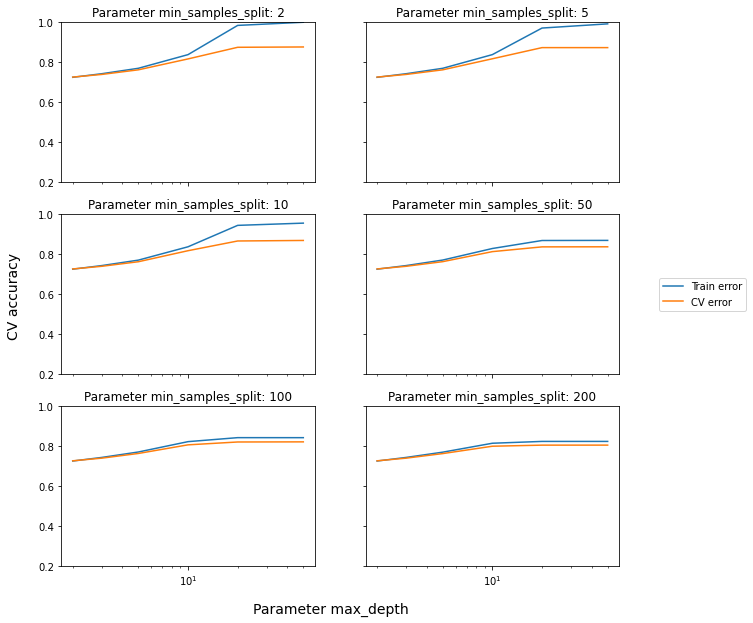

In [53]:
# Plot CV errors vs. train errors for parameter selection
if model_selection:
    n_plot = n_min_samples_split
    
    n_col = 2
    n_row = int(n_plot / n_col)
    
    fig, axes = plt.subplots(n_row, n_col, sharex = 'col', sharey = 'row', figsize = (10, 10))
    
    for i_plot in np.arange(0, n_plot):
        i_row = int(i_plot / n_col)
        i_col = int(i_plot % n_col)
        ax = axes[i_row, i_col]
        ax.set_title('Parameter min_samples_split: %g' % test_min_samples_split[i_plot])
        ax.semilogx(test_max_depth, err_train[i_plot], label = 'Train error')
        ax.semilogx(test_max_depth, err_cv[i_plot], label = 'CV error')
        ax.set_ylim([0.2, 1.0])
        
    ax.legend(bbox_to_anchor = (1.5, 1.7), loc = 'center right', borderaxespad = 0.)
    fig.text(0.5, 0.06, 'Parameter max_depth', ha = 'center', fontsize = 14)
    fig.text(0.05, 0.5, 'CV accuracy', va = 'center', rotation = 'vertical', fontsize = 14)

In [54]:
blind = pd.read_csv(r"C:\Users\lenovo\Downloads\blind.csv")

### Apply optimized RF model to blind test

In [56]:
# Create predictor variables and outcome variable
predictors = blind.drop(['Facies', 'Well_name', 'POR', 'lithofacies', 'Facies_Labels', 'Reservoir_Status', 'Depth'], axis = 1)
outcome = blind['Facies'].values
predictors.describe()

,GR,SP,DEN,RESDEP
count,8781.000000,8781.000000,8781.000000,8781.000000
mean,60.002338,45.790999,2.438999,8.419192
std,22.757041,20.438730,0.112635,13.345505
min,13.353700,-2.917357,2.217700,0.781800
25%,38.350201,34.308411,2.324000,1.939800
50%,68.270203,46.211121,2.517900,3.556600
75%,78.056198,64.383530,2.525400,10.643500
max,146.568802,76.247971,2.534100,136.382599


In [57]:
from sklearn.preprocessing import QuantileTransformer

# Assuming 'predictors' is your data array
quantile_transformer = QuantileTransformer(output_distribution='normal').fit(predictors)
X_blind= quantile_transformer.transform(predictors)

In [58]:
y_blind=outcome

In [71]:
print('Adjusted facies prediction accuracy on test set: %f' % accuracy_adj(cm, facies_neighbors))

Adjusted facies prediction accuracy on test set: 0.852636


In [59]:
y_predict = clf.predict(X_blind)
cm = confusion_matrix(y_blind, y_predict)

In [60]:
print('Facies prediction accuracy on blind test: %f' % accuracy(cm))

Facies prediction accuracy on blind test: 0.633299


In [61]:
print('Adjusted facies prediction accuracy on blind test: %f' % accuracy_adj(cm, facies_neighbors))

Adjusted facies prediction accuracy on blind test: 0.852636


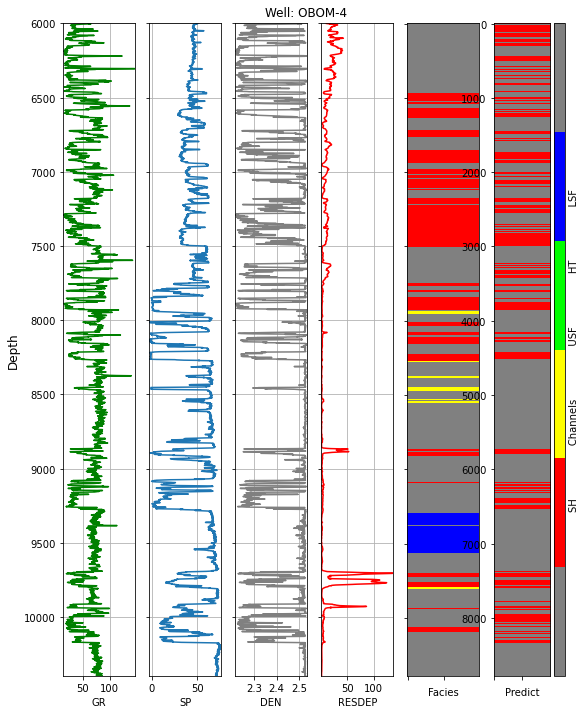

In [62]:
# Plot the predict facies vs. the true facies
blind['Predict'] = y_predict
plot_data(blind, ['Facies', 'Predict'], facies_labels, facies_colors)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


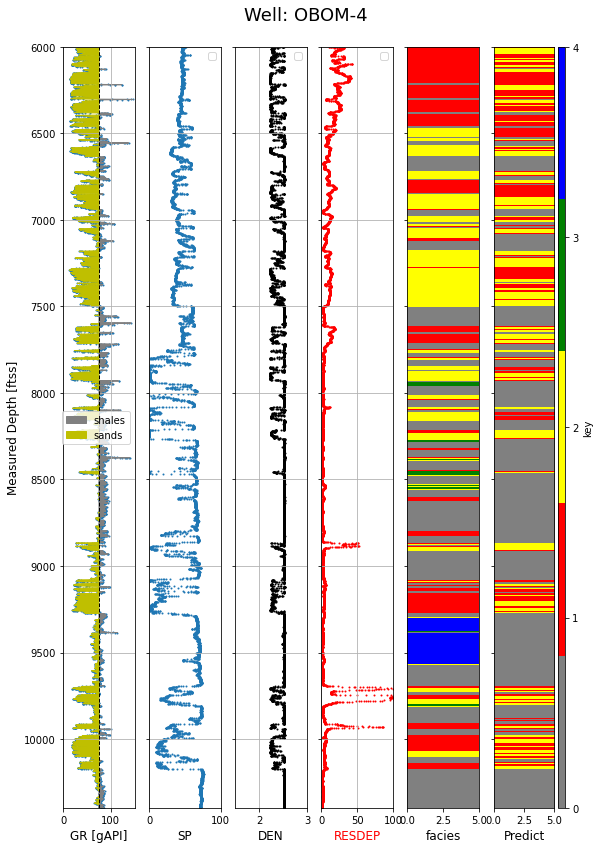

In [69]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

obom4_data = blind[blind['Well_name'] == 'OBOM-4']
# Create subplots
fig, axs = plt.subplots(1, 6, figsize=(9,14), sharex=False, sharey= True)
fig.suptitle('Well: OBOM-4', fontsize=18, y=0.92)
# Plot GR
ax = axs[0]
ax.scatter(obom4_data['GR'], obom4_data['Depth'], s=1)
ax.set_xlim(0, 150)
ax.set_xlabel('GR [gAPI]', fontsize='large')
ax.set_ylabel('Measured Depth [ftss]', fontsize='large')
ax.grid()

# Fill shales and sands
ax.fill_betweenx(obom4_data['Depth'], blind['GR'], 75,
                 where=obom4_data['GR'] > 75, interpolate=True, color='gray', label='shales')
ax.fill_betweenx(obom4_data['Depth'], obom4_data['GR'], 75,
                 where=obom4_data['GR'] < 75, interpolate=True, color='y', label='sands')
ax.axvline(75, color='k', linewidth=1, linestyle='--')
ax.legend()
ax.invert_yaxis()

ax=axs[1]
ax.scatter(obom4_data['SP'], obom4_data['Depth'],s=1)
ax.set_xlim(-0.1,100)
ax.set_xlabel('SP', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[2]
ax.scatter(obom4_data['DEN'], obom4_data['Depth'],s=1, color = 'black')
ax.set_xlim(1.5,3)
ax.set_xlabel('DEN', fontsize='large')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

ax=axs[3]
ax.scatter(obom4_data['RESDEP'], obom4_data['Depth'],s=1, color = 'r')
ax.set_xlim(0.0, 100)
ax.set_xlabel('RESDEP', color = 'r', fontsize='12')
ax.grid()
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()

# Map Facies values to colors
facies_colors = {0: 'grey', 1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}
obom4_data['Facies_color'] = obom4_data['Facies'].map(facies_colors)


# Your other plotting code here

ax = axs[4]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom4_data['Facies'], obom4_data['Facies'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom4_data['Depth']), min(obom4_data['Depth'])], cmap=cmap_facies)
ax.set_xlabel('facies', color = 'black', fontsize='12')

ax = axs[5]
cmap_facies = colors.ListedColormap(list(facies_colors.values()))
F = np.vstack((obom4_data['Predict'], obom4_data['Predict'])).T
im = ax.imshow(F, aspect='auto', vmin=0, vmax=len(facies_colors)-1,
               extent=[0, 5, max(obom4_data['Depth']), min(obom4_data['Depth'])], cmap=cmap_facies)
ax.set_xlabel('Predict', color = 'black', fontsize='12')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.05)
cbar = plt.colorbar(im, cax=cax, ticks=list(facies_colors.keys()))
cbar.set_label('key')
cbar.set_ticklabels(list(facies_colors.keys()))

# Show the plot
plt.show()

In [70]:
# Save the DataFrame to a CSV file
blind.to_csv('blind_rf.csv', index=False) 